<a href="https://colab.research.google.com/github/jamal221/Machine_Learning_Project/blob/main/TextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/CSV_Files/")

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('per.csv')
data.head()

,NewsID,Title,Body,Date,Time,Category,Category2
0,843656,\nوزير علوم درجمع استادان نمونه: سن بازنشستگي ...,\nوزير علوم در جمع استادان نمونه كشور گفت: از ...,\n138/5//09,\n0:9::18,\nآموزشي-,\nآموزشي
1,837144,\nگردهمايي دانش‌آموختگان موسسه آموزش عالي سوره...,\nبه گزارش سرويس صنفي آموزشي خبرگزاري دانشجويا...,\n138/5//09,\n1:4::11,\nآموزشي-,\nآموزشي
2,436862,\nنتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور...,\nنتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و...,\n138/3//07,\n1:0::03,\nآموزشي-,\nآموزشي
3,227781,\nهمايش يكروزه آسيب شناسي مفهوم روابط عمومي در...,\n,\n138/2//02,\n1:3::42,\nاجتماعي-خانواده-,\nاجتماعي
4,174187,\nوضعيت اقتصادي و ميزان تحصيلات والدين از مهمت...,\nمحمدتقي علوي يزدي، مجري اين طرح پژوهشي در اي...,\n138/1//08,\n1:1::49,\nآموزشي-,\nآموزشي


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NewsID     10999 non-null  int64 
 1   Title      10999 non-null  object
 2   Body       10999 non-null  object
 3   Date       10999 non-null  object
 4   Time       10999 non-null  object
 5   Category   10999 non-null  object
 6   Category2  10999 non-null  object
dtypes: int64(1), object(6)
memory usage: 601.6+ KB


In [ ]:
len(data['Category2'].unique())

11

In [ ]:
len(data['Category'].unique())

97

In [ ]:
print(data['Body'].iloc[0])


وزير علوم در جمع استادان نمونه كشور گفت: از استادان نمونه كشور انتظار مي‌رود كه رويكرد دانايي محوري و گفتمان علمي را به عنوان يك بحث فرهنگي در دانشگاهها توسعه و رونق بخشند. به گزارش سرويس صنفي آموزشي خبرگزاري دانشجويان ايران (ايسنا)، دكتر محمد مهدي زاهدي در اولين مجمع عمومي استادان نمونه دانشگاه‌هاي سراسر كشور كه در دانشگاه تهران برگزار شد، افزود: توصيه ما در جهت تلاش براي دانايي محوري و توسعه گفتمان علمي به معني عدم تمايل به مباحث سياسي نيست؛ بلكه برعكس، دانشگاه بايد مهد چالشهاي گفتماني باشد ولي اين امر، بدان معني نيست كه دانشگاه، ابزار دست سياسيون قرار بگيرد. وي تأكيد كرد: دانشگاه نه تنها نبايد تحت تأثير القائات سياسي قرار بگيرد؛ بلكه بايد خط دهنده و برنامه‌ريز جريانات سياسي باشد و مهمترين عنصر پياده شدن اين آرمان، دانشجويان و اعضاي هيات علمي دانشگاهها و در رأس آنها استادان نمونه هستند. وزير علوم با ذكر اين نكته كه در جامعه اطلاعاتي نمي‌توان هيچ تفكري را با تهديد و ارعاب حاكم كرد، افزود: اگر چه دانشگاهها بايد پرچمدار كرسيهاي آزاد انديشي و حاكميت دانايي محوري باشند، بايد توجه داشته ب

In [ ]:
with open('stopwords.txt',encoding='utf8') as stopwords_file:
    stopwords = stopwords_file.readlines()

In [ ]:
print(stopwords)

['\ufeff!\n', '"\n', '#\n', '(\n', ')\n', '*\n', ',\n', '-\n', '.\n', '/\n', ':\n', '[\n', ']\n', '«\n', '»\n', '،\n', '؛\n', '؟\n', 'آباد\n', 'آخ\n', 'آخر\n', 'آخرها\n', 'آخه\n', 'آدمهاست\n', 'آرام\n', 'آرام آرام\n', 'آره\n', 'آری\n', 'آزادانه\n', 'آسان\n', 'آسیب پذیرند\n', 'آشنایند\n', 'آشکارا\n', 'آقا\n', 'آقای\n', 'آقایان\n', 'آمد\n', 'آمدن\n', 'آمده\n', 'آمرانه\n', 'آن\n', 'آن گاه\n', 'آنان\n', 'آنانی\n', 'آنجا\n', 'آنرا\n', 'آنطور\n', 'آنقدر\n', 'آنها\n', 'آنهاست\n', 'آنچنان\n', 'آنچنان که\n', 'اونجور\n', 'اونجوری\n', 'اونجوری که\n', 'آنچه\n', 'آنکه\n', 'آنگاه\n', 'آن\u200cها\n', 'آهان\n', 'آهای\n', 'آور\n', 'آورد\n', 'آوردن\n', 'آورده\n', 'آوه\n', 'آی\n', 'آیا\n', 'آید\n', 'آیند\n', 'ا\n', 'اتفاقا\n', 'اثرِ\n', 'اجراست\n', 'احتراما\n', 'احتمالا\n', 'احیاناً\n', 'اخیر\n', 'اخیراً\n', 'اری\n', 'از\n', 'از آن پس\n', 'از بس که\n', 'از جمله\n', 'ازاین رو\n', 'ازجمله\n', 'ازش\n', 'اساسا\n', 'اساساً\n', 'است\n', 'استفاد\n', 'استفاده\n', 'اسلامی اند\n', 'اش\n', 'اشتباها\n', 'اشکارا\n', 

In [ ]:
stopwords=[w.replace('\n','') for w in stopwords  ]


In [ ]:
print(stopwords)

['\ufeff!', '"', '#', '(', ')', '*', ',', '-', '.', '/', ':', '[', ']', '«', '»', '،', '؛', '؟', 'آباد', 'آخ', 'آخر', 'آخرها', 'آخه', 'آدمهاست', 'آرام', 'آرام آرام', 'آره', 'آری', 'آزادانه', 'آسان', 'آسیب پذیرند', 'آشنایند', 'آشکارا', 'آقا', 'آقای', 'آقایان', 'آمد', 'آمدن', 'آمده', 'آمرانه', 'آن', 'آن گاه', 'آنان', 'آنانی', 'آنجا', 'آنرا', 'آنطور', 'آنقدر', 'آنها', 'آنهاست', 'آنچنان', 'آنچنان که', 'اونجور', 'اونجوری', 'اونجوری که', 'آنچه', 'آنکه', 'آنگاه', 'آن\u200cها', 'آهان', 'آهای', 'آور', 'آورد', 'آوردن', 'آورده', 'آوه', 'آی', 'آیا', 'آید', 'آیند', 'ا', 'اتفاقا', 'اثرِ', 'اجراست', 'احتراما', 'احتمالا', 'احیاناً', 'اخیر', 'اخیراً', 'اری', 'از', 'از آن پس', 'از بس که', 'از جمله', 'ازاین رو', 'ازجمله', 'ازش', 'اساسا', 'اساساً', 'است', 'استفاد', 'استفاده', 'اسلامی اند', 'اش', 'اشتباها', 'اشکارا', 'اصلا', 'اصلاً', 'اصولا', 'اصولاً', 'اعلام', 'اغلب', 'افزود', 'افسوس', 'اقل', 'اقلیت', 'الا', 'الان', 'البته', 'البتّه', 'الهی', 'الی', 'ام', 'اما', 'امروز', 'امروزه', 'امسال', 'امشب', 'امور',

In [ ]:
len(stopwords)

1892

In [ ]:
with open('stopwords-Farsi1.txt',encoding='utf8') as stopwords_file2:
    stopwords2 = stopwords_file2.readlines()

In [ ]:
print(stopwords2)

['\ufeffات\n', 'اتفاقا\n', 'اجراست\n', 'احتمالا\n', 'احيانا\n', 'اخ\n', 'اختصارا\n', 'اخر\n', 'اخرها\n', 'اخه\n', 'اخيرا\n', 'ادمهاست\n', 'اراسته\n', 'ارام\n', 'ارزانتر\n', 'ارزومندانه\n', 'ارنه\n', 'اره\n', 'از\n', 'ازادانه\n', 'ازان\n', 'ازانجا\n', 'ازانجاكه\n', 'ازاين\n', 'ازاينرو\n', 'ازبه\n', 'ازجمله\n', 'ازروي\n', 'ازسر\n', 'ازش\n', 'ازقبيل\n', 'ازلحاظ\n', 'ازنظر\n', 'ازو\n', 'ازيك\n', 'اساس\n', 'اساسا\n', 'اسان\n', 'اسانتر\n', 'اساني\n', 'است\n', 'استوارتر\n', 'اسيبپذيرند\n', 'اش\n', 'اشان\n', 'اشتباها\n', 'اشفته\n', 'اشكار\n', 'اشكارا\n', 'اشكارتر\n', 'اشنايند\n', 'اصطلاحا\n', 'اصلا\n', 'اصولا\n', 'اطلاعند\n', 'اغلب\n', 'افزودن\n', 'افسوس\n', 'افقي\n', 'اقل\n', 'اقلا\n', 'اقليت\n', 'اكتسابا\n', 'اكثر\n', 'اكثرا\n', 'اكثريت\n', 'اكنون\n', 'الا\n', 'الاسف\n', 'الان\n', 'البته\n', 'الزاما\n', 'الظاهر\n', 'المقدور\n', 'الهي\n', 'الي\n', 'ام\n', 'اما\n', 'امان\n', 'امرانه\n', 'امروز\n', 'امروزه\n', 'امسال\n', 'امشب\n', 'اميدوارم\n', 'اميدوارند\n', 'اميدواريم\n', 'ان\n', 'انان\n', 'ا

In [ ]:
stopwords2=[w.replace('\n','') for w in stopwords2  ]

In [ ]:
stopwords2[0]

'\ufeffات'

In [ ]:
stopwords2[0]=stopwords2[0].replace('\ufeff','')

In [ ]:
print(stopwords2)

['ات', 'اتفاقا', 'اجراست', 'احتمالا', 'احيانا', 'اخ', 'اختصارا', 'اخر', 'اخرها', 'اخه', 'اخيرا', 'ادمهاست', 'اراسته', 'ارام', 'ارزانتر', 'ارزومندانه', 'ارنه', 'اره', 'از', 'ازادانه', 'ازان', 'ازانجا', 'ازانجاكه', 'ازاين', 'ازاينرو', 'ازبه', 'ازجمله', 'ازروي', 'ازسر', 'ازش', 'ازقبيل', 'ازلحاظ', 'ازنظر', 'ازو', 'ازيك', 'اساس', 'اساسا', 'اسان', 'اسانتر', 'اساني', 'است', 'استوارتر', 'اسيبپذيرند', 'اش', 'اشان', 'اشتباها', 'اشفته', 'اشكار', 'اشكارا', 'اشكارتر', 'اشنايند', 'اصطلاحا', 'اصلا', 'اصولا', 'اطلاعند', 'اغلب', 'افزودن', 'افسوس', 'افقي', 'اقل', 'اقلا', 'اقليت', 'اكتسابا', 'اكثر', 'اكثرا', 'اكثريت', 'اكنون', 'الا', 'الاسف', 'الان', 'البته', 'الزاما', 'الظاهر', 'المقدور', 'الهي', 'الي', 'ام', 'اما', 'امان', 'امرانه', 'امروز', 'امروزه', 'امسال', 'امشب', 'اميدوارم', 'اميدوارند', 'اميدواريم', 'ان', 'انان', 'اناني', 'انجا', 'اند', 'اندك', 'اندكي', 'انرا', 'انشاالله', 'انقدر', 'انكس', 'انكه', 'انم', 'انها', 'انهاست', 'انوقت', 'انچنان', 'انچه', 'انگار', 'انگاه', 'انگه', 'انگونه', 'اهان', 'اها

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk_stopwords = nltk.corpus.stopwords.words('english')
#nltk_stopwords

In [ ]:
nltk_stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(nltk_stopwords)
len(stopwords)

2071

In [ ]:
stopwords.extend(stopwords2)
len(stopwords)

3326

In [ ]:
!pip install hazm
# We have to run this code once, then we restart the colab and execute all of the code line by line

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.5/367.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 21.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [ ]:
from hazm import *

normalizer = Normalizer()
normalizer.normalize('اصلاح نويسه ها و استفاده از نیم‌فاصله پردازش را آسان مي كند')
'اصلاح نویسه‌ها و استفاده از نیم‌فاصله پردازش را آسان می‌کند'


'اصلاح نویسه\u200cها و استفاده از نیم\u200cفاصله پردازش را آسان می\u200cکند'

In [ ]:
sent_tokenize('ما هم برای وصل کردن آمدیم! ولی برای پردازش، جدا بهتر نیست؟')
['ما هم برای وصل کردن آمدیم!', 'ولی برای پردازش، جدا بهتر نیست؟']
word_tokenize('ولی برای پردازش، جدا بهتر نیست؟')
['ولی', 'برای', 'پردازش', '،', 'جدا', 'بهتر', 'نیست', '؟']

['ولی', 'برای', 'پردازش', '،', 'جدا', 'بهتر', 'نیست', '؟']

In [ ]:
stemmer = Stemmer()
stemmer.stem('سبزیجات')


'سبزیج'

In [ ]:
lemmatizer = Lemmatizer()
lemmatizer.lemmatize('خورم')

'خورد#خور'

In [ ]:
import hazm
stemmer = hazm.Stemmer()
lem=hazm.Lemmatizer()

In [ ]:
lemmatizer2 = hazm.Lemmatizer()

In [ ]:
stemmer.stem('کتاب ها')

'کتاب '

In [ ]:
lemmatizer2.lemmatize('گفت')


'گفت#گو'

In [ ]:
from hazm import word_tokenize

In [ ]:
ss='معاملات امروز بازار سهام با فشار فروش شدید در تمامی گروه‌ها همراه بود و بازار سهام بازدهی روز سه شنبه و چهارشنبه خود را از سهامداران پس گرفت‌.'

In [ ]:
# print(word_tokenize(ss))
# print(word_tokenize(ss))
sent=""
for w in word_tokenize(ss):
  sent=sent+" "+ w
print(sent)



 معاملات امروز بازار سهام با فشار فروش شدید در تمامی گروه‌ها همراه بود و بازار سهام بازدهی روز سه شنبه و چهارشنبه خود را از سهامداران پس گرفت‌ .


In [ ]:
# print(word_tokenize(ss))
stopped_word=[w for w in word_tokenize(ss) if not w in stopwords ]
sent2=""
for ww in stopped_word:
  sent2=sent2+" "+ ww
print(sent2)
# print(stemed_word)

 معاملات بازار سهام فشار فروش گروه‌ها همراه بازار سهام بازدهی شنبه چهارشنبه سهامداران گرفت‌


In [ ]:
stemmed_word=[stemmer.stem(w) for w in stopped_word]
sent3=""
for www in stemmed_word:
  sent3=sent3+" "+ www
print(sent3)
# print(stemed_word)

 معامل بازار س فشار فرو گروه همراه بازار س بازده شنبه چهارشنبه سهامدار گرفت


In [ ]:
dataset = pd.DataFrame(columns=('title_body', 'category'))
for index, row in data.iterrows():
    title_body = row['Title'] + ' ' + row['Body']
    title_body_tokenized = word_tokenize(title_body)
    title_body_tokenized_filtered = [w for w in title_body_tokenized if not w in stopwords]
    title_body_tokenized_filtered_stemmed = [stemmer.stem(w) for w in title_body_tokenized_filtered]
    title_body_tokenized_filtered_lem = [lem.lemmatize(w).replace('#',' ') for w in title_body_tokenized_filtered]
    dataset.loc[index] = {
        'title_body': ' '.join(title_body_tokenized_filtered_lem)+' '+ ' '.join(title_body_tokenized_filtered_stemmed),
        'category': row['Category2'].replace('\n', '')
    }

In [ ]:
data.head()

,NewsID,Title,Body,Date,Time,Category,Category2
0,843656,\nوزير علوم درجمع استادان نمونه: سن بازنشستگي ...,\nوزير علوم در جمع استادان نمونه كشور گفت: از ...,\n138/5//09,\n0:9::18,\nآموزشي-,\nآموزشي
1,837144,\nگردهمايي دانش‌آموختگان موسسه آموزش عالي سوره...,\nبه گزارش سرويس صنفي آموزشي خبرگزاري دانشجويا...,\n138/5//09,\n1:4::11,\nآموزشي-,\nآموزشي
2,436862,\nنتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور...,\nنتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و...,\n138/3//07,\n1:0::03,\nآموزشي-,\nآموزشي
3,227781,\nهمايش يكروزه آسيب شناسي مفهوم روابط عمومي در...,\n,\n138/2//02,\n1:3::42,\nاجتماعي-خانواده-,\nاجتماعي
4,174187,\nوضعيت اقتصادي و ميزان تحصيلات والدين از مهمت...,\nمحمدتقي علوي يزدي، مجري اين طرح پژوهشي در اي...,\n138/1//08,\n1:1::49,\nآموزشي-,\nآموزشي


In [ ]:
dataset.head()

,title_body,category
0,وزير علوم درجمع استاد نمونه سن بازنشستگي استاد...,آموزشي
1,گردهمايي دانش‌آموختگان موسسه آموزش سوره برگزار...,آموزشي
2,نتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور ن...,آموزشي
3,همايش يكروزه آسيب مفهوم روابط عمومي بابلسر برگ...,اجتماعي
4,وضعيت اقتصادي تحصيلات والدين مهمترين عوامل موف...,آموزشي


In [ ]:
dataset[dataset['category']=='فرهنگي'].count()

title_body    1000
category      1000
dtype: int64

In [ ]:
dataset['category'].unique()

array(['آموزشي', 'اجتماعي', 'تاريخي', 'اقتصادي', 'بهداشتي', 'علمي',
       'سياسي', 'فرهنگي', 'فقه و حقوق', 'مذهبي', 'ورزشي'], dtype=object)

In [ ]:
xx=dataset['category'].unique()
dict1=dict()
for i in range(len(dataset['category'].unique())):
  res=dataset[dataset['category']==xx[i]].count()
  # print(res[0])
  dict1[xx[i]]=res[0]
  # print(xx[i],dataset[dataset['category']==xx[i]].count())

In [ ]:
print(dict1)

{'آموزشي': 1000, 'اجتماعي': 1000, 'تاريخي': 999, 'اقتصادي': 1000, 'بهداشتي': 1000, 'علمي': 1000, 'سياسي': 1000, 'فرهنگي': 1000, 'فقه و حقوق': 1000, 'مذهبي': 1000, 'ورزشي': 1000}


In [ ]:
dataset['title_body']

0        وزير علوم درجمع استاد نمونه سن بازنشستگي استاد...
1        گردهمايي دانش‌آموختگان موسسه آموزش سوره برگزار...
2        نتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور ن...
3        همايش يكروزه آسيب مفهوم روابط عمومي بابلسر برگ...
4        وضعيت اقتصادي تحصيلات والدين مهمترين عوامل موف...
                               ...                        
10994    گزارش حقي طلا گزارش ايسنا كوران مسابقات دوچرخه...
10995    مدير تيم‌هاي ملي كشتي فرنگي نفرات قهرماني كشور...
10996    تساوي چلسي ادامه صدرنشيني آرسنال تساوي اشتوتگا...
10997    شكست ايران پرتغال آيينه‌ي خبرگزاري‌ها دويچه‌ول...
10998    هادي شكوري صدر جدول تصاحب دست نخواهيم نيم نگاه...
Name: title_body, Length: 10999, dtype: object

In [ ]:
dataset

,title_body,category
0,وزير علوم درجمع استاد نمونه سن بازنشستگي استاد...,آموزشي
1,گردهمايي دانش‌آموختگان موسسه آموزش سوره برگزار...,آموزشي
2,نتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور ن...,آموزشي
3,همايش يكروزه آسيب مفهوم روابط عمومي بابلسر برگ...,اجتماعي
4,وضعيت اقتصادي تحصيلات والدين مهمترين عوامل موف...,آموزشي
...,...,...
10994,گزارش حقي طلا گزارش ايسنا كوران مسابقات دوچرخه...,ورزشي
10995,مدير تيم‌هاي ملي كشتي فرنگي نفرات قهرماني كشور...,ورزشي
10996,تساوي چلسي ادامه صدرنشيني آرسنال تساوي اشتوتگا...,ورزشي
10997,شكست ايران پرتغال آيينه‌ي خبرگزاري‌ها دويچه‌ول...,ورزشي


In [95]:
dataset.shape

(10999, 2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vectorizer.fit(dataset['title_body'])

TfidfVectorizer(ngram_range=(1, 2))

In [ ]:
X = vectorizer.transform(dataset['title_body'])

In [ ]:
X.shape

(10999, 1840763)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y = le.fit_transform(dataset['category'])

In [ ]:
print(set(y))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [69]:
le.inverse_transform([7])

array(['فرهنگي'], dtype=object)

In [ ]:
le.classes_

array(['آموزشي', 'اجتماعي', 'اقتصادي', 'بهداشتي', 'تاريخي', 'سياسي',
       'علمي', 'فرهنگي', 'فقه و حقوق', 'مذهبي', 'ورزشي'], dtype=object)

In [ ]:
len(y)

10999

In [ ]:
import numpy as np
print(np.unique(dataset['category']))

['آموزشي' 'اجتماعي' 'اقتصادي' 'بهداشتي' 'تاريخي' 'سياسي' 'علمي' 'فرهنگي'
 'فقه و حقوق' 'مذهبي' 'ورزشي']


In [ ]:
np.shape(X)

(10999, 1840763)

In [ ]:
np.shape(y)

(10999,)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [72]:
from sklearn import svm
svmc = svm.SVC()

In [73]:

svmc.fit(X_train, y_train)

SVC()

In [74]:
svmc.score(X_test, y_test)

0.8429090909090909

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = svmc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       257
           1       0.55      0.73      0.62       227
           2       0.88      0.76      0.81       241
           3       0.83      0.93      0.88       259
           4       0.93      0.88      0.91       238
           5       0.80      0.77      0.78       249
           6       0.87      0.75      0.80       271
           7       0.78      0.85      0.81       224
           8       0.91      0.86      0.88       246
           9       0.96      0.88      0.92       268
          10       0.98      0.96      0.97       270

    accuracy                           0.84      2750
   macro avg       0.85      0.84      0.84      2750
weighted avg       0.85      0.84      0.85      2750



In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       257
           1       0.55      0.73      0.62       227
           2       0.88      0.76      0.81       241
           3       0.83      0.93      0.88       259
           4       0.93      0.88      0.91       238
           5       0.80      0.77      0.78       249
           6       0.87      0.75      0.80       271
           7       0.78      0.85      0.81       224
           8       0.91      0.86      0.88       246
           9       0.96      0.88      0.92       268
          10       0.98      0.96      0.97       270

    accuracy                           0.84      2750
   macro avg       0.85      0.84      0.84      2750
weighted avg       0.85      0.84      0.85      2750



In [77]:
print(confusion_matrix(y_test, y_pred))

[[227   9   1   4   0   1  11   4   0   0   0]
 [ 13 165   4   8   4   8   8  12   1   3   1]
 [  0  43 182   2   0   6   2   3   2   1   0]
 [  0   7   2 242   0   3   4   0   0   0   1]
 [  0   6   1   0 210  12   0   8   1   0   0]
 [  3  15   4   2   8 192   3   7  14   1   0]
 [ 13   8   5  30   1   0 203   9   1   0   1]
 [  3  14   3   1   1   3   2 191   0   4   2]
 [  3  14   2   1   2  10   1   2 211   0   0]
 [  0  14   2   2   0   5   0   7   1 237   0]
 [  1   6   0   1   0   1   0   3   0   0 258]]


In [78]:
import seaborn as sb
import matplotlib.pyplot as plt

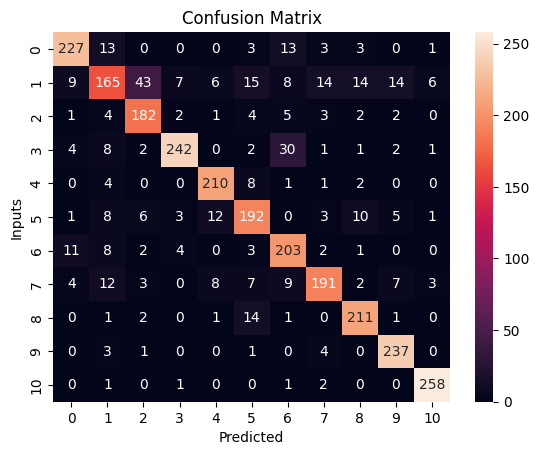

In [79]:
cm = confusion_matrix(y_pred, y_test)
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Inputs")
plt.title("Confusion Matrix")
plt.show()

In [97]:
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload

In [98]:
with open('/content/drive/My Drive/Colab Notebooks/Text_Files/new_news.txt', 'r') as f:
    new_news = f.read()
print(new_news)

﻿ه گزارش خبرنگار مهر، شاخص کل بورس امروز معاملات خوبی را ثبت کرد، نمادهای پرتراکنش امروز عبارتند از: خساپا، خودرو، شستا، شپنا و فولاد.

نکته مثبت معاملات امروز ثبت شدن آخرین قیمت بالاتر از قیمت پایانی بود، حال شاخص کل بورس در وضعیت مثبت قرار گرفته است، اما احتمال خالی کردن نوسانگیران در معاملات یکشنبه وجود دارد.

اگر بازارساز قصد حمایت از بازار سرمایه داشته باشد می‌توان متصور بود که در نیمه اول معاملات روز یکشنبه وضعیت با عرضه بوده و در نیمه دوم با تقاضا توسط بازار ساز وضعیت بازار صعودی شود، در صورت عدم حمایت بازار ساز دوباره وضعیت نوسانی با ارزش معاملات کم در بورس را شاهد خواهیم بود.

در صورت عبور از وضعیت عرضه در معاملات یکشنبه شاخص کل به مقاومت ۲ میلیون و ۳۵۰ هزار واحد رسیده و این که بتواند از آن ناحیه بگذرد نیاز به نوسان منفی و سپس قدرت گرفتن برای صعود است.


In [99]:
def create_a_normalized_txt(file_in):
  change_news = word_tokenize(file_in)
  change_news_filtered = [w for w in change_news if not w in stopwords]
  change_news_filtered_stemmed = [stemmer.stem(w) for w in change_news_filtered]
  return change_news_filtered_stemmed

In [100]:
normalized_news=' '.join(create_a_normalized_txt(new_news))

In [101]:
df_new_news = pd.DataFrame(columns=['title_body_news'])


In [102]:
df_new_news.loc[0]={'title_body_news':normalized_news}
df_new_news

,title_body_news
0,﻿ه گزار خبرنگار مهر شاخص بورس معامل خوب ثب نما...


In [103]:
vectorizer_new = TfidfVectorizer(ngram_range=(1, 2))
vectorizer_new.fit(df_new_news['title_body_news'])

TfidfVectorizer(ngram_range=(1, 2))

In [104]:
X_new_news = vectorizer_new.transform(df_new_news['title_body_news'])

In [105]:
X_new_news.shape

(1, 126)

In [106]:
X_new_news.resize(1,X.shape[1])

In [107]:
X_new_news.shape

(1, 1840763)

In [108]:
y_pred_new = svmc.predict(X_new_news)
y_pred_new

array([1])

In [109]:
le.inverse_transform([1])

array(['اجتماعي'], dtype=object)

In [110]:
from scipy.sparse import csr_matrix

In [111]:
print(X_new_news)

  (0, 0)	0.0607456739230787
  (0, 1)	0.0607456739230787
  (0, 2)	0.0607456739230787
  (0, 3)	0.0607456739230787
  (0, 4)	0.0607456739230787
  (0, 5)	0.0607456739230787
  (0, 6)	0.2429826956923148
  (0, 7)	0.1214913478461574
  (0, 8)	0.0607456739230787
  (0, 9)	0.0607456739230787
  (0, 10)	0.0607456739230787
  (0, 11)	0.0607456739230787
  (0, 12)	0.1822370217692361
  (0, 13)	0.0607456739230787
  (0, 14)	0.0607456739230787
  (0, 15)	0.0607456739230787
  (0, 16)	0.0607456739230787
  (0, 17)	0.0607456739230787
  (0, 18)	0.0607456739230787
  (0, 19)	0.0607456739230787
  (0, 20)	0.0607456739230787
  (0, 21)	0.0607456739230787
  (0, 22)	0.1214913478461574
  (0, 23)	0.0607456739230787
  (0, 24)	0.0607456739230787
  :	:
  (0, 101)	0.0607456739230787
  (0, 102)	0.1214913478461574
  (0, 103)	0.0607456739230787
  (0, 104)	0.0607456739230787
  (0, 105)	0.0607456739230787
  (0, 106)	0.0607456739230787
  (0, 107)	0.30372836961539346
  (0, 108)	0.0607456739230787
  (0, 109)	0.1214913478461574
  (0, 11